### Ускорение
$$ S = \frac{T_{\text{serial}}}{T_{\text{parallel}}}$$


### Эффективность
$$ E = \frac{S}{p}  = \frac{T_\text{serial}}{p T_\text{parallel}}$$

## Аппроксимация ускорения и эффективности
* Для каждого числа потоков $p$ будем вычислять $T_{parallel}$ как среднее десяти (в случае rw_lock -- одного) запусков для одних и тех же входных данных.
* Временем работы программы $T_\text{serial}$ без распараллеливания будем считать как время работы программы, запущенной с параметром $\text{nthreads} = 1$.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("ticks", {'axes.grid': True})

In [3]:
def calc_acceleration_n_efficiency(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    lst = df[df['threads'] == 1]['time']
    lst = pd.concat([lst] * 9, axis = 0, ignore_index=True)
    df['acceleration'] = lst / df['time']
    df['efficiency'] = lst / (df['time'] * df['threads'])
    return df

In [4]:
def show_main_figures(df: pd.DataFrame):
    g = sns.FacetGrid(df, col='points', col_wrap=3, height=3, aspect=2, hue='threads')
    plt.yscale('log')
    g.map(sns.barplot, 'threads', 'time').add_legend()
    g.set_ylabels("time in seconds")
    g.figure.subplots_adjust(top=0.9) 
    g.figure.suptitle("time")
    for ax in g.axes:
        for p in ax.patches:
                ax.annotate("%.5f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()  ),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

    g = sns.FacetGrid(df, col='points', col_wrap=3, height=3, aspect=2, hue='threads')
    g.figure.subplots_adjust(top=0.9) 
    g.figure.suptitle("acceleration")
    g.map(sns.barplot, 'threads', 'acceleration').add_legend()
    for ax in g.axes:
        for p in ax.patches:
                ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()  ),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

    g = sns.FacetGrid(df, col='points', col_wrap=3, height=3, aspect=2, hue='threads')
    g.map(sns.barplot, 'threads', 'efficiency').add_legend()
    g.figure.subplots_adjust(top=0.9) 
    g.figure.suptitle('efficiency')
    for ax in g.axes:
        for p in ax.patches:
                ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()  ),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
                
    plt.show()

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


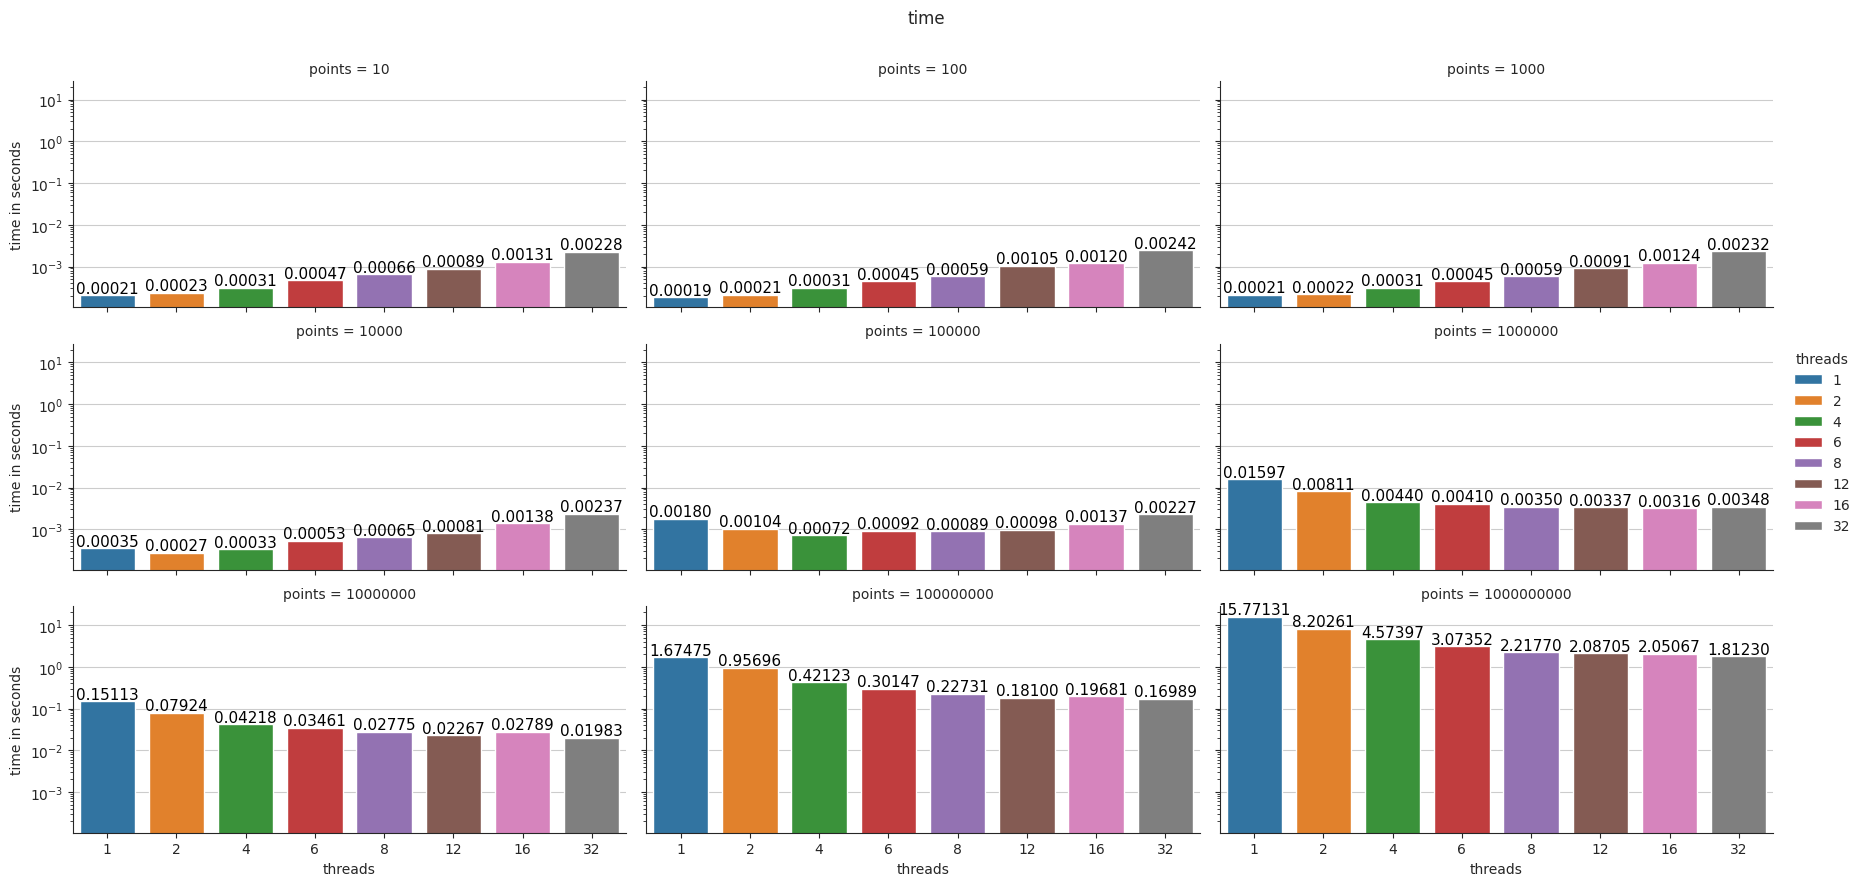

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


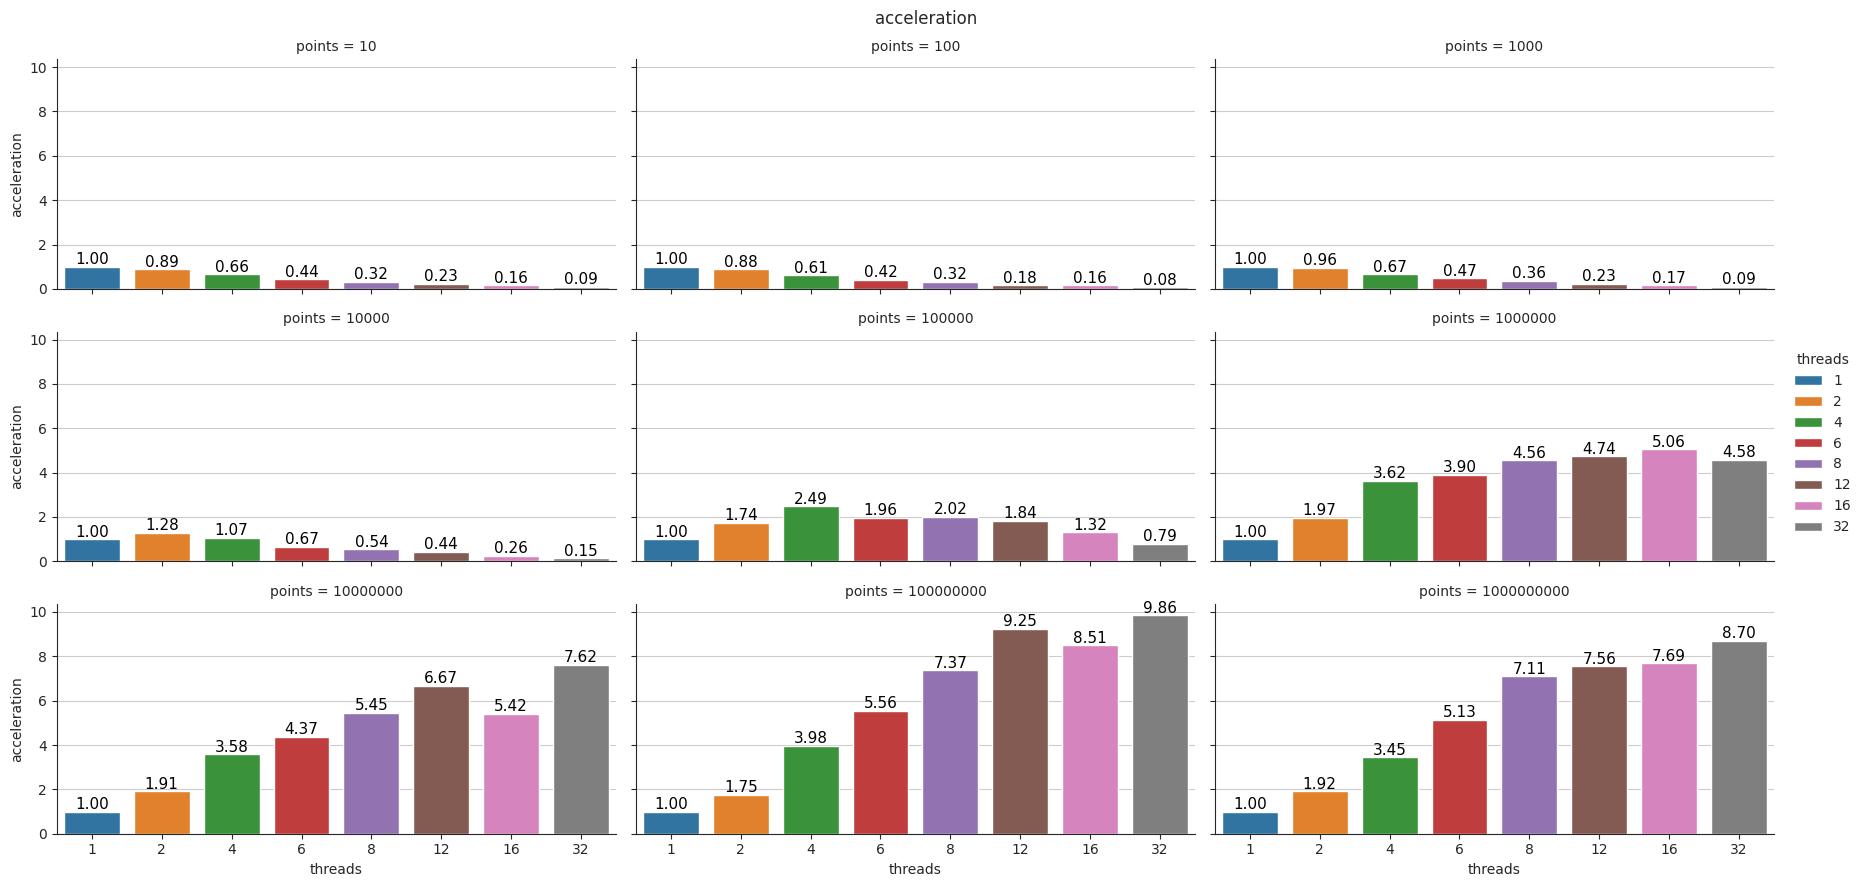

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


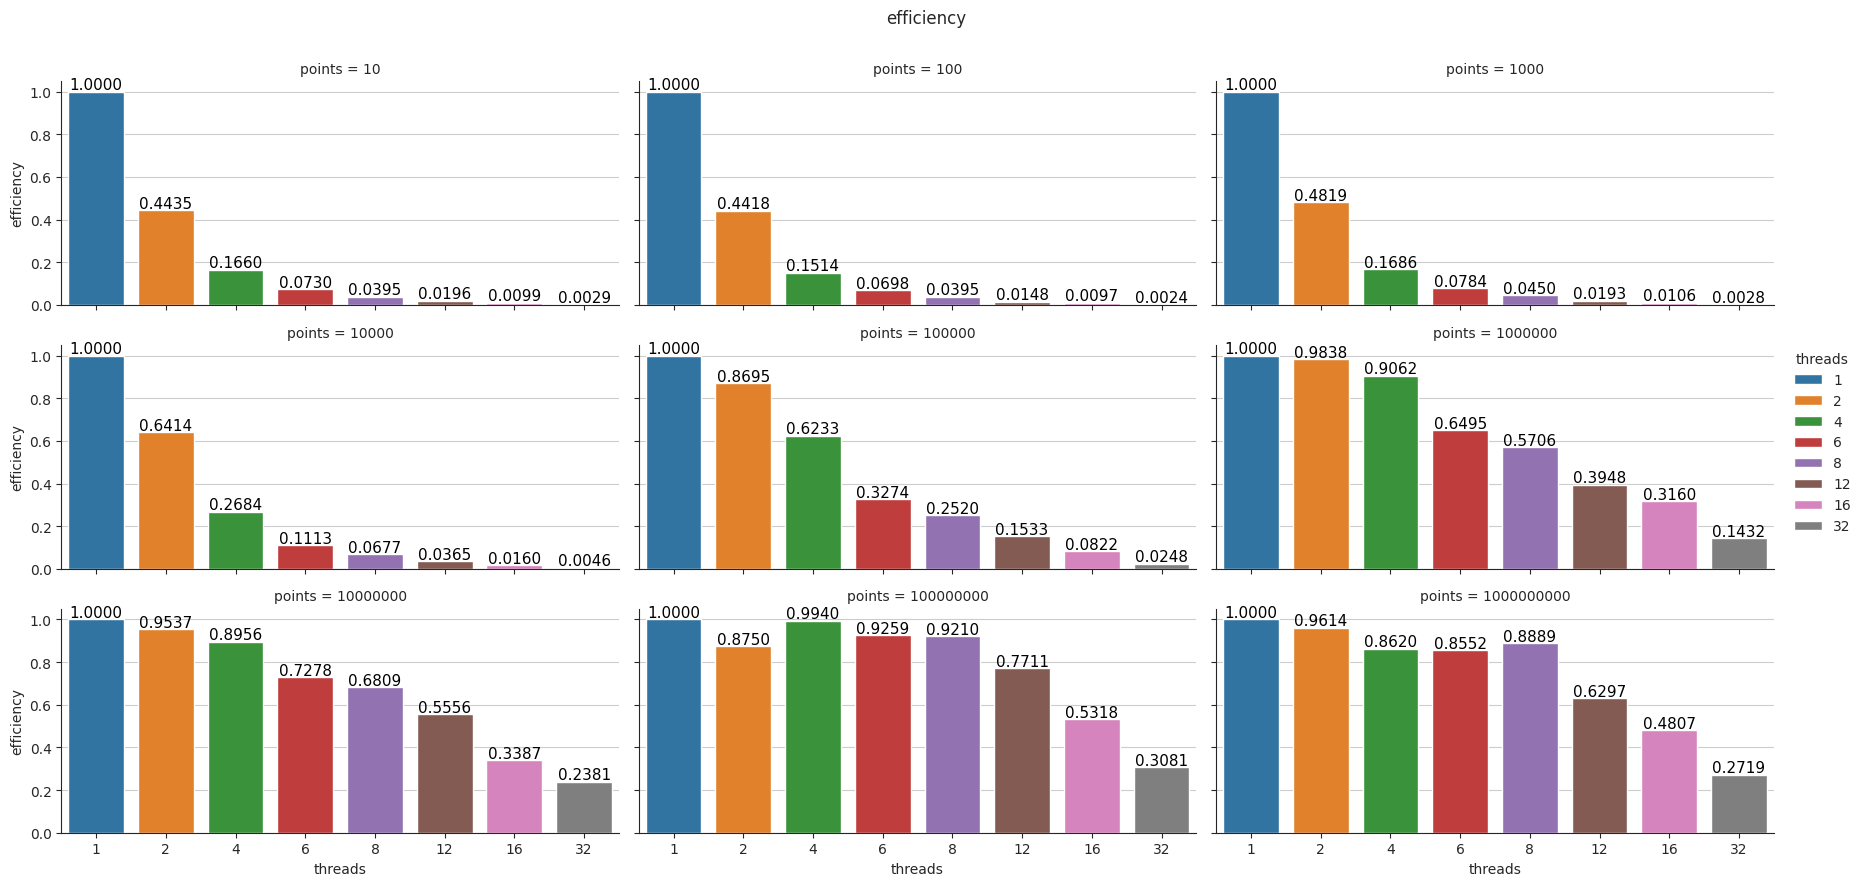

In [5]:
pi_df = pd.read_csv('csv/pi_time.csv', index_col=0)
pi_df = calc_acceleration_n_efficiency(pi_df)
show_main_figures(pi_df)

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


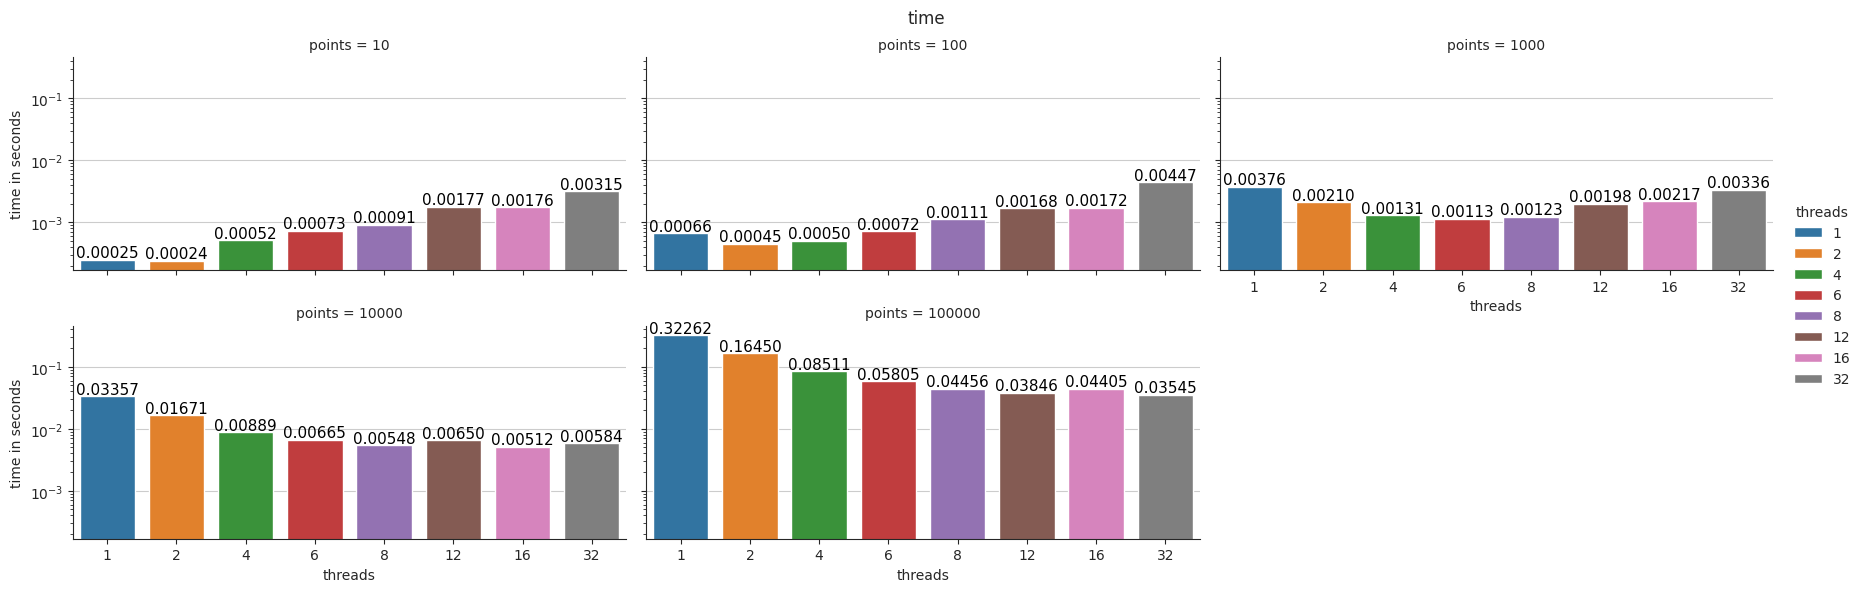

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


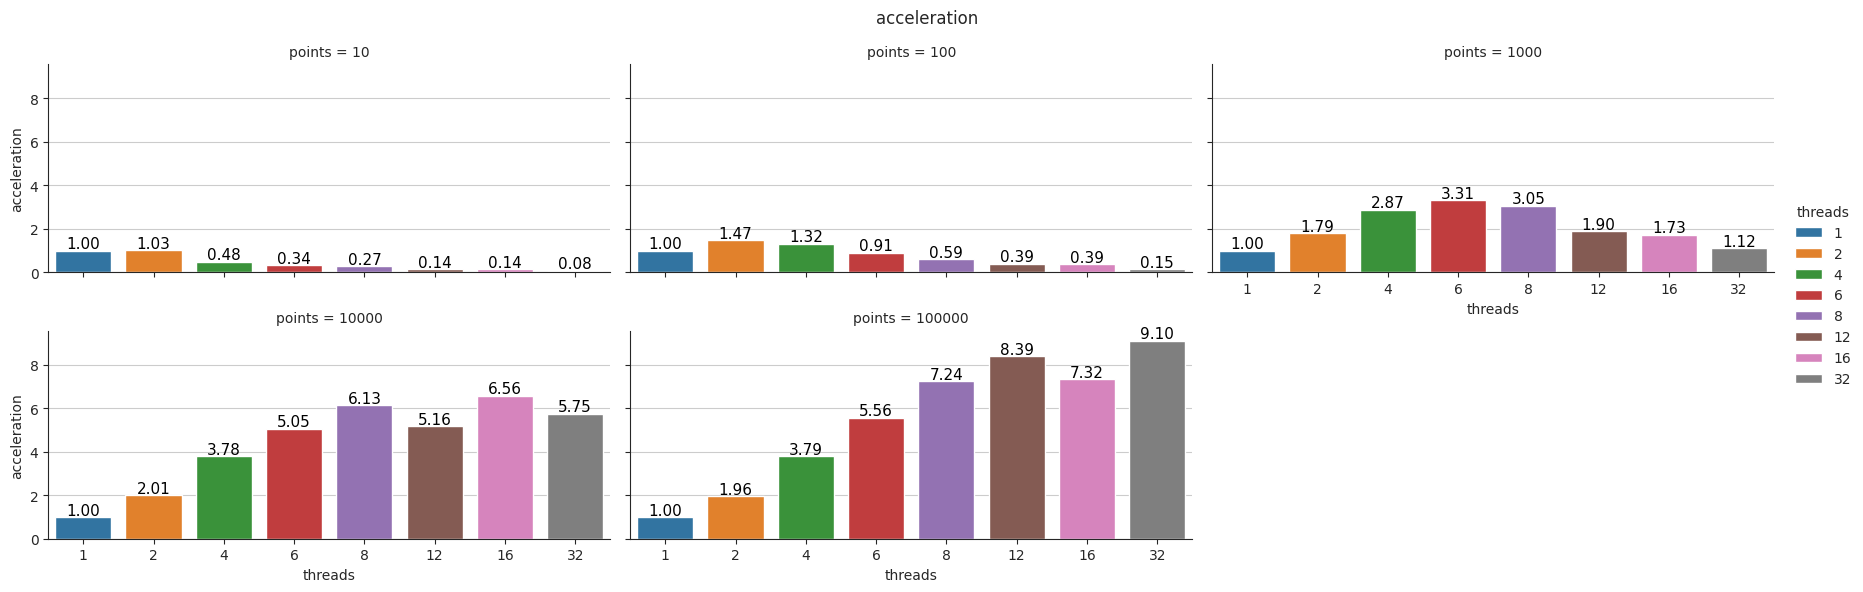

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


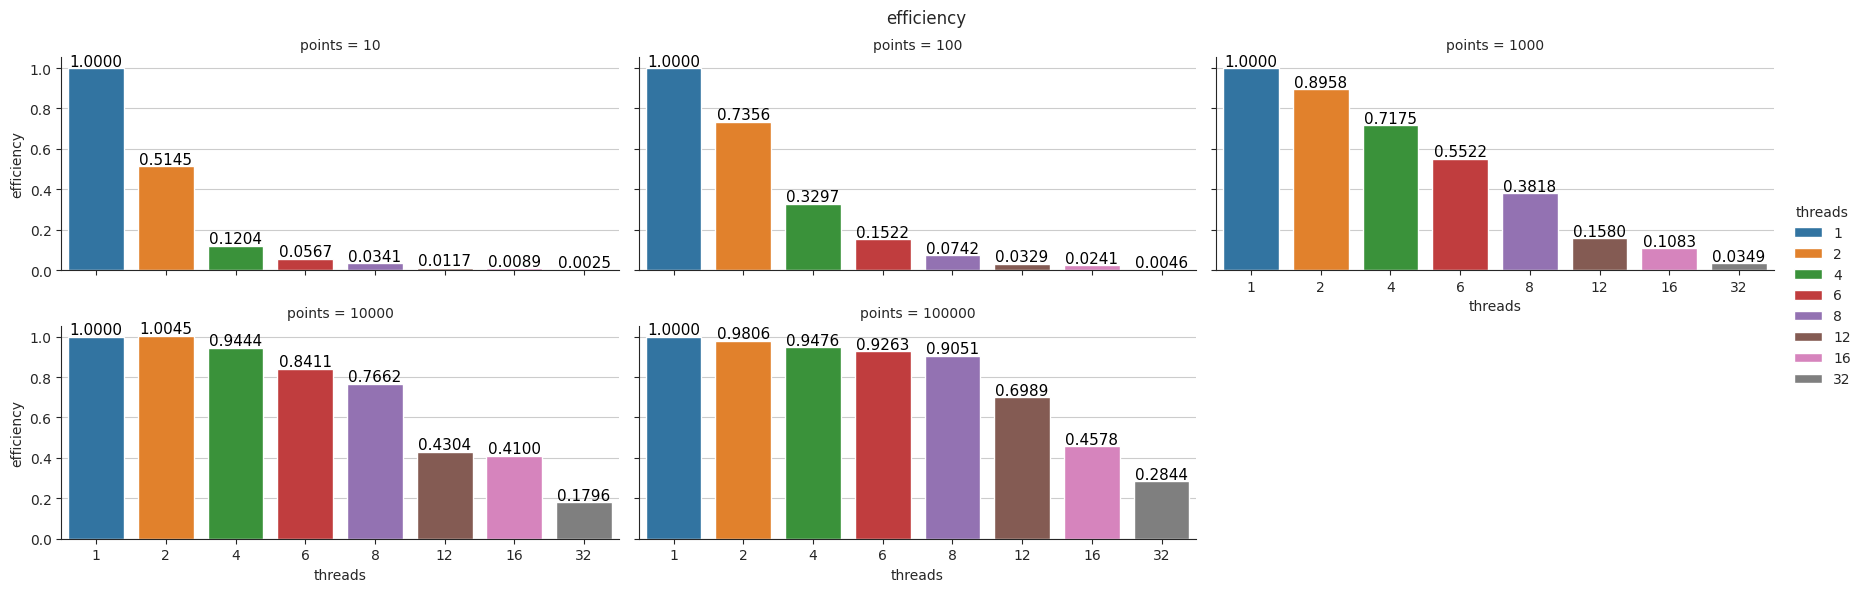

In [6]:
mandelbrot_df = pd.read_csv("./csv/mandelbrot_time.csv")
mandelbrot_df = calc_acceleration_n_efficiency(mandelbrot_df)
show_main_figures(mandelbrot_df)

In [7]:
pth_ll_rwl = pd.read_csv("./csv/pth_ll_rwl.csv", index_col=0)
pth_ll_rwl = pth_ll_rwl.sort_values(["threads", "keys", "searc", "insert"]).reset_index(drop=True)
pth_ll_rwl = calc_acceleration_n_efficiency(pth_ll_rwl)

In [24]:
threadsMask = lambda threads : (
    pth_ll_rwl["threads"] == threads
)


thread1 = pth_ll_rwl[threadsMask(1)]
thread6 = pth_ll_rwl[threadsMask(6)]
thread12 = pth_ll_rwl[threadsMask(12)]

In [25]:
my_rwl = pd.read_csv("./csv/pth_ll_rwl_writers.csv", index_col=0)

my_rwl = my_rwl.sort_values(["threads", "keys", "searc", "insert"]).reset_index(drop=True)
my_rwl = calc_acceleration_n_efficiency(my_rwl)

In [31]:
my_rwl[my_rwl['acceleration'] > 1]

,threads,keys,operations,searc,insert,time,acceleration,efficiency
161,2,1000,1000,1.0,0.0,0.001158,1.942142,0.971071
213,2,10000,10000,0.9,0.0,0.285551,1.308519,0.654260
214,2,10000,10000,0.9,0.1,0.310601,1.202285,0.601143
215,2,10000,10000,1.0,0.0,0.189490,1.965370,0.982685
269,4,1000,1000,1.0,0.0,0.001069,2.103835,0.525959
321,4,10000,10000,0.9,0.0,0.290026,1.288329,0.322082
322,4,10000,10000,0.9,0.1,0.305874,1.220865,0.305216
323,4,10000,10000,1.0,0.0,0.109792,3.392032,0.848008
377,6,1000,1000,1.0,0.0,0.000980,2.294898,0.382483
429,6,10000,10000,0.9,0.0,0.334698,1.116377,0.186063


In [26]:
mythreadsMask = lambda threads : (
    my_rwl["threads"] == threads
)


mythread1 = my_rwl[mythreadsMask(1)]
mythread6 = my_rwl[mythreadsMask(6)]
mythread12 = my_rwl[mythreadsMask(12)]

In [27]:
comparison_df = pth_ll_rwl[["threads", "keys", "searc", "insert"]]
comparison_df

,threads,keys,searc,insert
0,1,1000,0.1,0.0
1,1,1000,0.1,0.1
2,1,1000,0.1,0.2
3,1,1000,0.1,0.3
4,1,1000,0.1,0.4
...,...,...,...,...
859,32,10000,0.8,0.1
860,32,10000,0.8,0.2
861,32,10000,0.9,0.0
862,32,10000,0.9,0.1


In [28]:
collumns_diff = ["time", "efficiency"]

In [29]:
for col in collumns_diff:
    comparison_df["p_time"] = pth_ll_rwl["time"]
    comparison_df["my_time"] = my_rwl["time"]
    comparison_df[col] =  my_rwl[col] / pth_ll_rwl[col]

/tmp/ipykernel_75157/556210066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df["p_time"] = pth_ll_rwl["time"]
/tmp/ipykernel_75157/556210066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df["my_time"] = my_rwl["time"]
/tmp/ipykernel_75157/556210066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [30]:
comparison_df

,threads,keys,searc,insert,p_time,my_time,time,efficiency
0,1,1000,0.1,0.0,0.001472,0.001545,1.049592,1.000000
1,1,1000,0.1,0.1,0.001739,0.002056,1.182289,1.000000
2,1,1000,0.1,0.2,0.001706,0.001716,1.005862,1.000000
3,1,1000,0.1,0.3,0.002103,0.003668,1.744175,1.000000
4,1,1000,0.1,0.4,0.001995,0.002110,1.057644,1.000000
...,...,...,...,...,...,...,...,...
859,32,10000,0.8,0.1,0.528724,0.843007,1.594418,0.625684
860,32,10000,0.8,0.2,0.580850,0.905130,1.558285,0.631110
861,32,10000,0.9,0.0,0.337326,0.501645,1.487122,0.689449
862,32,10000,0.9,0.1,0.397292,0.532570,1.340500,0.744933


In [35]:
comparison_df[comparison_df["threads"] != 1]["efficiency"].mean()

np.float64(0.5802857373935911)